# Census data analysis

First, we import pandas into our library

In [2]:
import pandas as pd 

 Next, we import census dataset downloaded from social explorer. Here, we have downloaded census data for census tracts that touch the route 20 bus line, which is what we plan to analyze for our final project.

In [3]:
df=pd.read_csv('../gdata/se_busline.csv')

Now, we start doing initial data exploration. How big is our dataset?

In [4]:
df.shape

(51, 196)

Next, we examine what the data looks like

In [5]:
df.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,SE_B13004_001,SE_B13004_002,SE_B13004_003,SE_B13004_004,SE_B13004_005,SE_A06001_001,SE_A06001_002,SE_A06001_003,SE_A06001_004,SE_A06001_005
0,6037207301,14000US06037207301,Census Tract 2073.01,"Census Tract 2073.01, Los Angeles County, Cali...",ca,140,0,ACSSF,4410,NaN,...,4806,1162,644,1806,3000,4806,3308,1498,783,715
1,6037207302,14000US06037207302,Census Tract 2073.02,"Census Tract 2073.02, Los Angeles County, Cali...",ca,140,0,ACSSF,4411,NaN,...,4555,1171,569,1740,2815,4556,3603,953,386,567
2,6037207502,14000US06037207502,Census Tract 2075.02,"Census Tract 2075.02, Los Angeles County, Cali...",ca,140,0,ACSSF,4414,NaN,...,2851,1002,533,1535,1316,2851,997,1854,1423,431
3,6037207710,14000US06037207710,Census Tract 2077.10,"Census Tract 2077.10, Los Angeles County, Cali...",ca,140,0,ACSSF,4415,NaN,...,4316,978,428,1406,2910,4350,2698,1652,908,744
4,6037208710,14000US06037208710,Census Tract 2087.10,"Census Tract 2087.10, Los Angeles County, Cali...",ca,140,0,ACSSF,4426,NaN,...,4622,513,805,1318,3304,4622,1711,2911,1454,1457


We have 196 columns. Pretty sure we don't need them all. 
Let's drop those we don't need and also rename some columns. But before that, let's actually see what these columns look like and what they contain. 

We overwrite default view settings to show all columns.

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
df.sample()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_PLACESE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_UACP,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_VTD,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_BTTR,Geo_BTBG,Geo_PUMA5,Geo_PUMA1,SE_A00001_001,SE_A00002_001,SE_A00002_002,SE_A00002_003,SE_A02001_001,SE_A02001_002,SE_A02001_003,SE_A01001_001,SE_A01001_002,SE_A01001_003,SE_A01001_004,SE_A01001_005,SE_A01001_006,SE_A01001_007,SE_A01001_008,SE_A01001_009,SE_A01001_010,SE_A01001_011,SE_A01001_012,SE_A01001_013,SE_A01004_001,SE_A01004_002,SE_A01004_003,SE_A03001_001,SE_A03001_002,SE_A03001_003,SE_A03001_004,SE_A03001_005,SE_A03001_006,SE_A03001_007,SE_A03001_008,SE_A04001_001,SE_A04001_002,SE_A04001_003,SE_A04001_004,SE_A04001_005,SE_A04001_006,SE_A04001_007,SE_A04001_008,SE_A04001_009,SE_A04001_010,SE_A04001_011,SE_A04001_012,SE_A04001_013,SE_A04001_014,SE_A04001_015,SE_A04001_016,SE_A04001_017,SE_A10008_001,SE_A10008_002,SE_A10008_003,SE_A10008_004,SE_A10008_005,SE_A10008_006,SE_A10008_007,SE_A10008_008,SE_A10008_009,SE_A11001_001,SE_A11001_002,SE_A11001_003,SE_A11001_004,SE_A11001_005,SE_A11001_006,SE_A12001_001,SE_A12001_002,SE_A12001_003,SE_A12001_004,SE_A12001_005,SE_A12001_006,SE_A12001_007,SE_A12001_008,SE_A12003_001,SE_A12003_002,SE_A12003_003,SE_A14006_001,SE_A10001_001,SE_A10060_001,SE_A10060_002,SE_A10060_003,SE_A10044_001,SE_A10044_002,SE_A10044_003,SE_A10047_001,SE_A10047_002,SE_A10047_003,SE_A10047_004,SE_A10032_001,SE_A10032_002,SE_A10032_003,SE_A10032_004,SE_A10032_005,SE_A10032_006,SE_A10032_007,SE_A10032_008,SE_A10032_009,SE_A10032_010,SE_A10032_011,SE_A10032_012,SE_A10057_001,SE_A10034_001,SE_A10034_002,SE_A10034_003,SE_A10034_004,SE_A10034_005,SE_A10034_006,SE_A10034_007,SE_A10034_008,SE_A10036_001,SE_A18009_001,SE_A18003_001,SE_A10037_001,SE_A10037_002,SE_A10037_003,SE_A13002_001,SE_A13002_002,SE_A13002_003,SE_A13002_004,SE_A13002_005,SE_A13002_006,SE_A13002_007,SE_A13002_008,SE_A13002_009,SE_A13002_010,SE_A13002_011,SE_A13004_001,SE_A13004_002,SE_A13004_003,SE_A13004_004,SE_A13004_005,SE_A13004_006,SE_A13004_007,SE_B13004_001,SE_B13004_002,SE_B13004_003,SE_B13004_004,SE_B13004_005,SE_A06001_001,SE_A06001_002,SE_A06001_003,SE_A06001_004,SE_A06001_005
46,6037700801,14000US06037700801,Census Tract 7008.01,"Census Tract 7008.01, Los Angeles County, Cali...",ca,140,0,ACSSF,5983,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,700801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4924,4924,8766.428,0.561688,4924,2191,2733,4924,37,199,196,141,151,992,604,718,391,557,549,389,47.8,40.9,50.7,4924,3767,52,0,814,0,179,112,4924,4613,3546,52,0,814,0,89,112,311,221,0,0,0,0,90,0,2518,1318,1026,292,141,151,1200,428,772,4492,1257,2126,0,767,342,4200,354,712,1025,1217,487,205,200,102,0,102,86216,3197,2518,732,1786,3197,2518,679,679,42,37,600,3197,591,537,54,61,180,458,423,1168,316,0,0,1968,2518,1288,1117,13,0,29,0,71,1110200.0,2488,29.9,32.400002,43.5,26.200001,1318,158,18,140,0,0,0,0,0,0,1160,4924,235,138,250,428,159,3714,4924,623,587,1210,3714,4924,2506,2418,1961,457


Next, we use the .info command to get a better idea of our data type

In [8]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 196 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geo_FIPS       51 non-null     int64  
 1   Geo_GEOID      51 non-null     object 
 2   Geo_NAME       51 non-null     object 
 3   Geo_QName      51 non-null     object 
 4   Geo_STUSAB     51 non-null     object 
 5   Geo_SUMLEV     51 non-null     int64  
 6   Geo_GEOCOMP    51 non-null     int64  
 7   Geo_FILEID     51 non-null     object 
 8   Geo_LOGRECNO   51 non-null     int64  
 9   Geo_US         0 non-null      float64
 10  Geo_REGION     0 non-null      float64
 11  Geo_DIVISION   0 non-null      float64
 12  Geo_STATECE    0 non-null      float64
 13  Geo_STATE      51 non-null     int64  
 14  Geo_COUNTY     51 non-null     int64  
 15  Geo_COUSUB     0 non-null      float64
 16  Geo_PLACE      0 non-null      float64
 17  Geo_PLACESE    0 non-null      float64
 18  Geo_TRACT  

Looks like we have a range of data types, including float, integer, and object.  
Since we plan to eventually make maps and combine with census tract boundaries, its worth examining the missing zero problem right away. 

In [9]:
df.Geo_STATE.head()

0    6
1    6
2    6
3    6
4    6
Name: Geo_STATE, dtype: int64

In [10]:
df.Geo_COUNTY.head()

0    37
1    37
2    37
3    37
4    37
Name: Geo_COUNTY, dtype: int64

In [14]:


df=pd.read_csv(
    '../gdata/se_busline.csv',   
     dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

Now we look at our data one more time. 

In [11]:
df.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_PLACESE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_UACP,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_VTD,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_BTTR,Geo_BTBG,Geo_PUMA5,Geo_PUMA1,SE_A00001_001,SE_A00002_001,SE_A00002_002,SE_A00002_003,SE_A02001_001,SE_A02001_002,SE_A02001_003,SE_A01001_001,SE_A01001_002,SE_A01001_003,SE_A01001_004,SE_A01001_005,SE_A01001_006,SE_A01001_007,SE_A01001_008,SE_A01001_009,SE_A01001_010,SE_A01001_011,SE_A01001_012,SE_A01001_013,SE_A01004_001,SE_A01004_002,SE_A01004_003,SE_A03001_001,SE_A03001_002,SE_A03001_003,SE_A03001_004,SE_A03001_005,SE_A03001_006,SE_A03001_007,SE_A03001_008,SE_A04001_001,SE_A04001_002,SE_A04001_003,SE_A04001_004,SE_A04001_005,SE_A04001_006,SE_A04001_007,SE_A04001_008,SE_A04001_009,SE_A04001_010,SE_A04001_011,SE_A04001_012,SE_A04001_013,SE_A04001_014,SE_A04001_015,SE_A04001_016,SE_A04001_017,SE_A10008_001,SE_A10008_002,SE_A10008_003,SE_A10008_004,SE_A10008_005,SE_A10008_006,SE_A10008_007,SE_A10008_008,SE_A10008_009,SE_A11001_001,SE_A11001_002,SE_A11001_003,SE_A11001_004,SE_A11001_005,SE_A11001_006,SE_A12001_001,SE_A12001_002,SE_A12001_003,SE_A12001_004,SE_A12001_005,SE_A12001_006,SE_A12001_007,SE_A12001_008,SE_A12003_001,SE_A12003_002,SE_A12003_003,SE_A14006_001,SE_A10001_001,SE_A10060_001,SE_A10060_002,SE_A10060_003,SE_A10044_001,SE_A10044_002,SE_A10044_003,SE_A10047_001,SE_A10047_002,SE_A10047_003,SE_A10047_004,SE_A10032_001,SE_A10032_002,SE_A10032_003,SE_A10032_004,SE_A10032_005,SE_A10032_006,SE_A10032_007,SE_A10032_008,SE_A10032_009,SE_A10032_010,SE_A10032_011,SE_A10032_012,SE_A10057_001,SE_A10034_001,SE_A10034_002,SE_A10034_003,SE_A10034_004,SE_A10034_005,SE_A10034_006,SE_A10034_007,SE_A10034_008,SE_A10036_001,SE_A18009_001,SE_A18003_001,SE_A10037_001,SE_A10037_002,SE_A10037_003,SE_A13002_001,SE_A13002_002,SE_A13002_003,SE_A13002_004,SE_A13002_005,SE_A13002_006,SE_A13002_007,SE_A13002_008,SE_A13002_009,SE_A13002_010,SE_A13002_011,SE_A13004_001,SE_A13004_002,SE_A13004_003,SE_A13004_004,SE_A13004_005,SE_A13004_006,SE_A13004_007,SE_B13004_001,SE_B13004_002,SE_B13004_003,SE_B13004_004,SE_B13004_005,SE_A06001_001,SE_A06001_002,SE_A06001_003,SE_A06001_004,SE_A06001_005
0,6037207301,14000US06037207301,Census Tract 2073.01,"Census Tract 2073.01, Los Angeles County, Cali...",ca,140,0,ACSSF,4410,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,207301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4806,4806,28940.57,0.166064,4806,2777,2029,4806,115,0,0,94,254,1302,1212,555,555,502,162,55,39.8,42.1,36.8,4806,2453,827,31,672,0,518,305,4806,3808,1983,827,0,672,0,50,276,998,470,0,31,0,0,468,29,3492,592,539,53,39,14,2900,1776,1124,4691,2614,1148,57,86,786,4343,572,455,1092,1477,465,148,134,50,0,50,52581,4118,3492,112,3380,4118,3492,626,626,557,0,69,4118,103,89,14,0,0,0,54,524,3406,0,31,0,3492,583,2245,0,0,15,15,634,663500.0,1578,29.900000,12.800000,12.800000,NaN,592,53,0,39,0,0,0,14,0,14,539,4806,493,103,566,375,269,3000,4806,1162,644,1806,3000,4806,3308,1498,783,715
1,6037207302,14000US06037207302,Census Tract 2073.02,"Census Tract 2073.02, Los Angeles County, Cali...",ca,140,0,ACSSF,4411,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,207302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4556,4556,46067.06,0.098899,4556,2686,1870,4556,0,64,34,0,238,1821,1037,688,402,244,13,15,35.7,36.6,33.1,4556,2121,823,60,767,0,346,439,4556,3887,1905,823,35,767,0,39,318,669,216,0,25,0,0,307,121,3163,516,386,130,119,11,2647,1705,942,4458,2716,875,351,77,439,4220,306,356,1071,1

In [16]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 196 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geo_FIPS       51 non-null     object 
 1   Geo_GEOID      51 non-null     object 
 2   Geo_NAME       51 non-null     object 
 3   Geo_QName      51 non-null     object 
 4   Geo_STUSAB     51 non-null     object 
 5   Geo_SUMLEV     51 non-null     int64  
 6   Geo_GEOCOMP    51 non-null     int64  
 7   Geo_FILEID     51 non-null     object 
 8   Geo_LOGRECNO   51 non-null     int64  
 9   Geo_US         0 non-null      float64
 10  Geo_REGION     0 non-null      float64
 11  Geo_DIVISION   0 non-null      float64
 12  Geo_STATECE    0 non-null      float64
 13  Geo_STATE      51 non-null     object 
 14  Geo_COUNTY     51 non-null     object 
 15  Geo_COUSUB     0 non-null      float64
 16  Geo_PLACE      0 non-null      float64
 17  Geo_PLACESE    0 non-null      float64
 18  Geo_TRACT  

We now know for sure that the new dataframe has correct datatypes!

# Dropping and renaming columns

First, we take a look at what columns are null 

In [12]:
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_PLACESE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PUMA5',
 'Geo_PUMA1']

That's a whole lot of empty columns. Next, we drop these empty columns from our dataset

In [13]:
df = df.dropna(axis=1,how="all")

In [14]:
df.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,SE_A00001_001,SE_A00002_001,SE_A00002_002,SE_A00002_003,SE_A02001_001,SE_A02001_002,SE_A02001_003,SE_A01001_001,SE_A01001_002,SE_A01001_003,SE_A01001_004,SE_A01001_005,SE_A01001_006,SE_A01001_007,SE_A01001_008,SE_A01001_009,SE_A01001_010,SE_A01001_011,SE_A01001_012,SE_A01001_013,SE_A01004_001,SE_A01004_002,SE_A01004_003,SE_A03001_001,SE_A03001_002,SE_A03001_003,SE_A03001_004,SE_A03001_005,SE_A03001_006,SE_A03001_007,SE_A03001_008,SE_A04001_001,SE_A04001_002,SE_A04001_003,SE_A04001_004,SE_A04001_005,SE_A04001_006,SE_A04001_007,SE_A04001_008,SE_A04001_009,SE_A04001_010,SE_A04001_011,SE_A04001_012,SE_A04001_013,SE_A04001_014,SE_A04001_015,SE_A04001_016,SE_A04001_017,SE_A10008_001,SE_A10008_002,SE_A10008_003,SE_A10008_004,SE_A10008_005,SE_A10008_006,SE_A10008_007,SE_A10008_008,SE_A10008_009,SE_A11001_001,SE_A11001_002,SE_A11001_003,SE_A11001_004,SE_A11001_005,SE_A11001_006,SE_A12001_001,SE_A12001_002,SE_A12001_003,SE_A12001_004,SE_A12001_005,SE_A12001_006,SE_A12001_007,SE_A12001_008,SE_A12003_001,SE_A12003_002,SE_A12003_003,SE_A14006_001,SE_A10001_001,SE_A10060_001,SE_A10060_002,SE_A10060_003,SE_A10044_001,SE_A10044_002,SE_A10044_003,SE_A10047_001,SE_A10047_002,SE_A10047_003,SE_A10047_004,SE_A10032_001,SE_A10032_002,SE_A10032_003,SE_A10032_004,SE_A10032_005,SE_A10032_006,SE_A10032_007,SE_A10032_008,SE_A10032_009,SE_A10032_010,SE_A10032_011,SE_A10032_012,SE_A10057_001,SE_A10034_001,SE_A10034_002,SE_A10034_003,SE_A10034_004,SE_A10034_005,SE_A10034_006,SE_A10034_007,SE_A10034_008,SE_A10036_001,SE_A18009_001,SE_A18003_001,SE_A10037_001,SE_A10037_002,SE_A10037_003,SE_A13002_001,SE_A13002_002,SE_A13002_003,SE_A13002_004,SE_A13002_005,SE_A13002_006,SE_A13002_007,SE_A13002_008,SE_A13002_009,SE_A13002_010,SE_A13002_011,SE_A13004_001,SE_A13004_002,SE_A13004_003,SE_A13004_004,SE_A13004_005,SE_A13004_006,SE_A13004_007,SE_B13004_001,SE_B13004_002,SE_B13004_003,SE_B13004_004,SE_B13004_005,SE_A06001_001,SE_A06001_002,SE_A06001_003,SE_A06001_004,SE_A06001_005
0,6037207301,14000US06037207301,Census Tract 2073.01,"Census Tract 2073.01, Los Angeles County, Cali...",ca,140,0,ACSSF,4410,6,37,207301,4806,4806,28940.57,0.166064,4806,2777,2029,4806,115,0,0,94,254,1302,1212,555,555,502,162,55,39.8,42.1,36.8,4806,2453,827,31,672,0,518,305,4806,3808,1983,827,0,672,0,50,276,998,470,0,31,0,0,468,29,3492,592,539,53,39,14,2900,1776,1124,4691,2614,1148,57,86,786,4343,572,455,1092,1477,465,148,134,50,0,50,52581,4118,3492,112,3380,4118,3492,626,626,557,0,69,4118,103,89,14,0,0,0,54,524,3406,0,31,0,3492,583,2245,0,0,15,15,634,663500.0,1578,29.900000,12.800000,12.800000,NaN,592,53,0,39,0,0,0,14,0,14,539,4806,493,103,566,375,269,3000,4806,1162,644,1806,3000,4806,3308,1498,783,715
1,6037207302,14000US06037207302,Census Tract 2073.02,"Census Tract 2073.02, Los Angeles County, Cali...",ca,140,0,ACSSF,4411,6,37,207302,4556,4556,46067.06,0.098899,4556,2686,1870,4556,0,64,34,0,238,1821,1037,688,402,244,13,15,35.7,36.6,33.1,4556,2121,823,60,767,0,346,439,4556,3887,1905,823,35,767,0,39,318,669,216,0,25,0,0,307,121,3163,516,386,130,119,11,2647,1705,942,4458,2716,875,351,77,439,4220,306,356,1071,1600,734,84,69,1,0,1,39809,3723,3163,196,2967,3723,3163,560,560,330,0,230,3723,13,13,0,0,0,103,0,256,3351,0,0,0,3163,600,2221,26,0,0,23,293,500000.0,1748,30.100000,26.700001,28.500000,17.9,516,89,45,44,0,0,0,0,0,0,427,4555,532,306,333,371,198,2815,4555,1171,569,1740,2815,4556,3603,953,386,567
2,6037207502,14000US06037207502,Census Tract 2075.02,"Census Tract 2075.02, Los Angeles County, Cali...",ca,140,0,ACSSF,4414,6,37,207502,2851,2851,17649.24,0.161537,2851,1364,1487,2851,29,0,11,0,36,644,248,236,182,309,742,414,66.9,45.9,77.9,2851,692,298,0,1662,0,96,103,2851,2707,644,298,0,1662,0,0,103,144,48,0,0,0,0,96,0,2187,430,430,0,0,0,1757,787,970,2811,791,1037,48,686,249,2775,638,325,510,607,427,201,67,0,0,0,19380,2334,2187,0,2187,2334,2187,147,147,113,0,34,2334,17,8

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Columns: 153 entries, Geo_FIPS to SE_A06001_005
dtypes: float64(10), int64(138), object(5)
memory usage: 61.1+ KB


In [16]:
df.shape

(51, 153)

We have reduced columns from 196 to 153 columns. Now, we still need to drop more variables, 
since we are literally only interested in income, race, and rent variables. 
Lets remove columns by categories, since we do have quite a lot of variables to work with

Let's first remove columns before population variables

In [17]:
columns_to_drop = ['Geo_GEOID','Geo_STUSAB','Geo_SUMLEV','Geo_GEOCOMP','Geo_FILEID','Geo_LOGRECNO']

In [18]:
df = df.drop(columns_to_drop,axis=1)
df.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,SE_A00001_001,SE_A00002_001,SE_A00002_002,SE_A00002_003,SE_A02001_001,SE_A02001_002,SE_A02001_003,SE_A01001_001,SE_A01001_002,SE_A01001_003,SE_A01001_004,SE_A01001_005,SE_A01001_006,SE_A01001_007,SE_A01001_008,SE_A01001_009,SE_A01001_010,SE_A01001_011,SE_A01001_012,SE_A01001_013,SE_A01004_001,SE_A01004_002,SE_A01004_003,SE_A03001_001,SE_A03001_002,SE_A03001_003,SE_A03001_004,SE_A03001_005,SE_A03001_006,SE_A03001_007,SE_A03001_008,SE_A04001_001,SE_A04001_002,SE_A04001_003,SE_A04001_004,SE_A04001_005,SE_A04001_006,SE_A04001_007,SE_A04001_008,SE_A04001_009,SE_A04001_010,SE_A04001_011,SE_A04001_012,SE_A04001_013,SE_A04001_014,SE_A04001_015,SE_A04001_016,SE_A04001_017,SE_A10008_001,SE_A10008_002,SE_A10008_003,SE_A10008_004,SE_A10008_005,SE_A10008_006,SE_A10008_007,SE_A10008_008,SE_A10008_009,SE_A11001_001,SE_A11001_002,SE_A11001_003,SE_A11001_004,SE_A11001_005,SE_A11001_006,SE_A12001_001,SE_A12001_002,SE_A12001_003,SE_A12001_004,SE_A12001_005,SE_A12001_006,SE_A12001_007,SE_A12001_008,SE_A12003_001,SE_A12003_002,SE_A12003_003,SE_A14006_001,SE_A10001_001,SE_A10060_001,SE_A10060_002,SE_A10060_003,SE_A10044_001,SE_A10044_002,SE_A10044_003,SE_A10047_001,SE_A10047_002,SE_A10047_003,SE_A10047_004,SE_A10032_001,SE_A10032_002,SE_A10032_003,SE_A10032_004,SE_A10032_005,SE_A10032_006,SE_A10032_007,SE_A10032_008,SE_A10032_009,SE_A10032_010,SE_A10032_011,SE_A10032_012,SE_A10057_001,SE_A10034_001,SE_A10034_002,SE_A10034_003,SE_A10034_004,SE_A10034_005,SE_A10034_006,SE_A10034_007,SE_A10034_008,SE_A10036_001,SE_A18009_001,SE_A18003_001,SE_A10037_001,SE_A10037_002,SE_A10037_003,SE_A13002_001,SE_A13002_002,SE_A13002_003,SE_A13002_004,SE_A13002_005,SE_A13002_006,SE_A13002_007,SE_A13002_008,SE_A13002_009,SE_A13002_010,SE_A13002_011,SE_A13004_001,SE_A13004_002,SE_A13004_003,SE_A13004_004,SE_A13004_005,SE_A13004_006,SE_A13004_007,SE_B13004_001,SE_B13004_002,SE_B13004_003,SE_B13004_004,SE_B13004_005,SE_A06001_001,SE_A06001_002,SE_A06001_003,SE_A06001_004,SE_A06001_005
0,6037207301,Census Tract 2073.01,"Census Tract 2073.01, Los Angeles County, Cali...",6,37,207301,4806,4806,28940.57,0.166064,4806,2777,2029,4806,115,0,0,94,254,1302,1212,555,555,502,162,55,39.8,42.1,36.8,4806,2453,827,31,672,0,518,305,4806,3808,1983,827,0,672,0,50,276,998,470,0,31,0,0,468,29,3492,592,539,53,39,14,2900,1776,1124,4691,2614,1148,57,86,786,4343,572,455,1092,1477,465,148,134,50,0,50,52581,4118,3492,112,3380,4118,3492,626,626,557,0,69,4118,103,89,14,0,0,0,54,524,3406,0,31,0,3492,583,2245,0,0,15,15,634,663500.0,1578,29.900000,12.800000,12.800000,NaN,592,53,0,39,0,0,0,14,0,14,539,4806,493,103,566,375,269,3000,4806,1162,644,1806,3000,4806,3308,1498,783,715
1,6037207302,Census Tract 2073.02,"Census Tract 2073.02, Los Angeles County, Cali...",6,37,207302,4556,4556,46067.06,0.098899,4556,2686,1870,4556,0,64,34,0,238,1821,1037,688,402,244,13,15,35.7,36.6,33.1,4556,2121,823,60,767,0,346,439,4556,3887,1905,823,35,767,0,39,318,669,216,0,25,0,0,307,121,3163,516,386,130,119,11,2647,1705,942,4458,2716,875,351,77,439,4220,306,356,1071,1600,734,84,69,1,0,1,39809,3723,3163,196,2967,3723,3163,560,560,330,0,230,3723,13,13,0,0,0,103,0,256,3351,0,0,0,3163,600,2221,26,0,0,23,293,500000.0,1748,30.100000,26.700001,28.500000,17.9,516,89,45,44,0,0,0,0,0,0,427,4555,532,306,333,371,198,2815,4555,1171,569,1740,2815,4556,3603,953,386,567
2,6037207502,Census Tract 2075.02,"Census Tract 2075.02, Los Angeles County, Cali...",6,37,207502,2851,2851,17649.24,0.161537,2851,1364,1487,2851,29,0,11,0,36,644,248,236,182,309,742,414,66.9,45.9,77.9,2851,692,298,0,1662,0,96,103,2851,2707,644,298,0,1662,0,0,103,144,48,0,0,0,0,96,0,2187,430,430,0,0,0,1757,787,970,2811,791,1037,48,686,249,2775,638,325,510,607,427,201,67,0,0,0,19380,2334,2187,0,2187,2334,2187,147,147,113,0,34,2334,17,8,9,9,30,11,0,10,2257,0,0,1984,2187,272,1799,0,0,0,0,116,NaN,471,28.000000,NaN,NaN,NaN,430,19,0,19,0,0,0,0,0,0,411,2851,99,103,800,328,205,1316,2851,1002,533,1535,1316,2851,997,1854,1423

In [19]:
df.shape

(51, 147)

Next, lets drop columns related to population variables that we do not need

In [20]:
columns_to_dropa = ['SE_A00002_001','SE_A00002_002','SE_A00002_003','SE_A02001_001']

In [21]:
df = df.drop(columns_to_dropa,axis=1)

In [22]:
df.shape

(51, 143)

In [23]:
df.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,SE_A00001_001,SE_A02001_002,SE_A02001_003,SE_A01001_001,SE_A01001_002,SE_A01001_003,SE_A01001_004,SE_A01001_005,SE_A01001_006,SE_A01001_007,SE_A01001_008,SE_A01001_009,SE_A01001_010,SE_A01001_011,SE_A01001_012,SE_A01001_013,SE_A01004_001,SE_A01004_002,SE_A01004_003,SE_A03001_001,SE_A03001_002,SE_A03001_003,SE_A03001_004,SE_A03001_005,SE_A03001_006,SE_A03001_007,SE_A03001_008,SE_A04001_001,SE_A04001_002,SE_A04001_003,SE_A04001_004,SE_A04001_005,SE_A04001_006,SE_A04001_007,SE_A04001_008,SE_A04001_009,SE_A04001_010,SE_A04001_011,SE_A04001_012,SE_A04001_013,SE_A04001_014,SE_A04001_015,SE_A04001_016,SE_A04001_017,SE_A10008_001,SE_A10008_002,SE_A10008_003,SE_A10008_004,SE_A10008_005,SE_A10008_006,SE_A10008_007,SE_A10008_008,SE_A10008_009,SE_A11001_001,SE_A11001_002,SE_A11001_003,SE_A11001_004,SE_A11001_005,SE_A11001_006,SE_A12001_001,SE_A12001_002,SE_A12001_003,SE_A12001_004,SE_A12001_005,SE_A12001_006,SE_A12001_007,SE_A12001_008,SE_A12003_001,SE_A12003_002,SE_A12003_003,SE_A14006_001,SE_A10001_001,SE_A10060_001,SE_A10060_002,SE_A10060_003,SE_A10044_001,SE_A10044_002,SE_A10044_003,SE_A10047_001,SE_A10047_002,SE_A10047_003,SE_A10047_004,SE_A10032_001,SE_A10032_002,SE_A10032_003,SE_A10032_004,SE_A10032_005,SE_A10032_006,SE_A10032_007,SE_A10032_008,SE_A10032_009,SE_A10032_010,SE_A10032_011,SE_A10032_012,SE_A10057_001,SE_A10034_001,SE_A10034_002,SE_A10034_003,SE_A10034_004,SE_A10034_005,SE_A10034_006,SE_A10034_007,SE_A10034_008,SE_A10036_001,SE_A18009_001,SE_A18003_001,SE_A10037_001,SE_A10037_002,SE_A10037_003,SE_A13002_001,SE_A13002_002,SE_A13002_003,SE_A13002_004,SE_A13002_005,SE_A13002_006,SE_A13002_007,SE_A13002_008,SE_A13002_009,SE_A13002_010,SE_A13002_011,SE_A13004_001,SE_A13004_002,SE_A13004_003,SE_A13004_004,SE_A13004_005,SE_A13004_006,SE_A13004_007,SE_B13004_001,SE_B13004_002,SE_B13004_003,SE_B13004_004,SE_B13004_005,SE_A06001_001,SE_A06001_002,SE_A06001_003,SE_A06001_004,SE_A06001_005
0,6037207301,Census Tract 2073.01,"Census Tract 2073.01, Los Angeles County, Cali...",6,37,207301,4806,2777,2029,4806,115,0,0,94,254,1302,1212,555,555,502,162,55,39.8,42.1,36.8,4806,2453,827,31,672,0,518,305,4806,3808,1983,827,0,672,0,50,276,998,470,0,31,0,0,468,29,3492,592,539,53,39,14,2900,1776,1124,4691,2614,1148,57,86,786,4343,572,455,1092,1477,465,148,134,50,0,50,52581,4118,3492,112,3380,4118,3492,626,626,557,0,69,4118,103,89,14,0,0,0,54,524,3406,0,31,0,3492,583,2245,0,0,15,15,634,663500.0,1578,29.900000,12.800000,12.800000,NaN,592,53,0,39,0,0,0,14,0,14,539,4806,493,103,566,375,269,3000,4806,1162,644,1806,3000,4806,3308,1498,783,715
1,6037207302,Census Tract 2073.02,"Census Tract 2073.02, Los Angeles County, Cali...",6,37,207302,4556,2686,1870,4556,0,64,34,0,238,1821,1037,688,402,244,13,15,35.7,36.6,33.1,4556,2121,823,60,767,0,346,439,4556,3887,1905,823,35,767,0,39,318,669,216,0,25,0,0,307,121,3163,516,386,130,119,11,2647,1705,942,4458,2716,875,351,77,439,4220,306,356,1071,1600,734,84,69,1,0,1,39809,3723,3163,196,2967,3723,3163,560,560,330,0,230,3723,13,13,0,0,0,103,0,256,3351,0,0,0,3163,600,2221,26,0,0,23,293,500000.0,1748,30.100000,26.700001,28.500000,17.9,516,89,45,44,0,0,0,0,0,0,427,4555,532,306,333,371,198,2815,4555,1171,569,1740,2815,4556,3603,953,386,567
2,6037207502,Census Tract 2075.02,"Census Tract 2075.02, Los Angeles County, Cali...",6,37,207502,2851,1364,1487,2851,29,0,11,0,36,644,248,236,182,309,742,414,66.9,45.9,77.9,2851,692,298,0,1662,0,96,103,2851,2707,644,298,0,1662,0,0,103,144,48,0,0,0,0,96,0,2187,430,430,0,0,0,1757,787,970,2811,791,1037,48,686,249,2775,638,325,510,607,427,201,67,0,0,0,19380,2334,2187,0,2187,2334,2187,147,147,113,0,34,2334,17,8,9,9,30,11,0,10,2257,0,0,1984,2187,272,1799,0,0,0,0,116,NaN,471,28.000000,NaN,NaN,NaN,430,19,0,19,0,0,0,0,0,0,411,2851,99,103,800,328,205,1316,2851,1002,533,1535,1316,2851,997,1854,1423,431
3,6037207710,Census Tract 2077.10,"Census Tract 2077.10, Los Angeles County, Cali...",6,37,207710,4350,2335,2015,4350,155,24,47,44,438,

Let's now drop variables related to male and female population

In [24]:
columns_to_dropb = ['SE_A02001_002','SE_A02001_003']

In [25]:
df = df.drop(columns_to_dropb,axis=1)

In [26]:
df.shape

(51, 141)

In [27]:
df.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,SE_A00001_001,SE_A01001_001,SE_A01001_002,SE_A01001_003,SE_A01001_004,SE_A01001_005,SE_A01001_006,SE_A01001_007,SE_A01001_008,SE_A01001_009,SE_A01001_010,SE_A01001_011,SE_A01001_012,SE_A01001_013,SE_A01004_001,SE_A01004_002,SE_A01004_003,SE_A03001_001,SE_A03001_002,SE_A03001_003,SE_A03001_004,SE_A03001_005,SE_A03001_006,SE_A03001_007,SE_A03001_008,SE_A04001_001,SE_A04001_002,SE_A04001_003,SE_A04001_004,SE_A04001_005,SE_A04001_006,SE_A04001_007,SE_A04001_008,SE_A04001_009,SE_A04001_010,SE_A04001_011,SE_A04001_012,SE_A04001_013,SE_A04001_014,SE_A04001_015,SE_A04001_016,SE_A04001_017,SE_A10008_001,SE_A10008_002,SE_A10008_003,SE_A10008_004,SE_A10008_005,SE_A10008_006,SE_A10008_007,SE_A10008_008,SE_A10008_009,SE_A11001_001,SE_A11001_002,SE_A11001_003,SE_A11001_004,SE_A11001_005,SE_A11001_006,SE_A12001_001,SE_A12001_002,SE_A12001_003,SE_A12001_004,SE_A12001_005,SE_A12001_006,SE_A12001_007,SE_A12001_008,SE_A12003_001,SE_A12003_002,SE_A12003_003,SE_A14006_001,SE_A10001_001,SE_A10060_001,SE_A10060_002,SE_A10060_003,SE_A10044_001,SE_A10044_002,SE_A10044_003,SE_A10047_001,SE_A10047_002,SE_A10047_003,SE_A10047_004,SE_A10032_001,SE_A10032_002,SE_A10032_003,SE_A10032_004,SE_A10032_005,SE_A10032_006,SE_A10032_007,SE_A10032_008,SE_A10032_009,SE_A10032_010,SE_A10032_011,SE_A10032_012,SE_A10057_001,SE_A10034_001,SE_A10034_002,SE_A10034_003,SE_A10034_004,SE_A10034_005,SE_A10034_006,SE_A10034_007,SE_A10034_008,SE_A10036_001,SE_A18009_001,SE_A18003_001,SE_A10037_001,SE_A10037_002,SE_A10037_003,SE_A13002_001,SE_A13002_002,SE_A13002_003,SE_A13002_004,SE_A13002_005,SE_A13002_006,SE_A13002_007,SE_A13002_008,SE_A13002_009,SE_A13002_010,SE_A13002_011,SE_A13004_001,SE_A13004_002,SE_A13004_003,SE_A13004_004,SE_A13004_005,SE_A13004_006,SE_A13004_007,SE_B13004_001,SE_B13004_002,SE_B13004_003,SE_B13004_004,SE_B13004_005,SE_A06001_001,SE_A06001_002,SE_A06001_003,SE_A06001_004,SE_A06001_005
0,6037207301,Census Tract 2073.01,"Census Tract 2073.01, Los Angeles County, Cali...",6,37,207301,4806,4806,115,0,0,94,254,1302,1212,555,555,502,162,55,39.8,42.1,36.8,4806,2453,827,31,672,0,518,305,4806,3808,1983,827,0,672,0,50,276,998,470,0,31,0,0,468,29,3492,592,539,53,39,14,2900,1776,1124,4691,2614,1148,57,86,786,4343,572,455,1092,1477,465,148,134,50,0,50,52581,4118,3492,112,3380,4118,3492,626,626,557,0,69,4118,103,89,14,0,0,0,54,524,3406,0,31,0,3492,583,2245,0,0,15,15,634,663500.0,1578,29.900000,12.800000,12.800000,NaN,592,53,0,39,0,0,0,14,0,14,539,4806,493,103,566,375,269,3000,4806,1162,644,1806,3000,4806,3308,1498,783,715
1,6037207302,Census Tract 2073.02,"Census Tract 2073.02, Los Angeles County, Cali...",6,37,207302,4556,4556,0,64,34,0,238,1821,1037,688,402,244,13,15,35.7,36.6,33.1,4556,2121,823,60,767,0,346,439,4556,3887,1905,823,35,767,0,39,318,669,216,0,25,0,0,307,121,3163,516,386,130,119,11,2647,1705,942,4458,2716,875,351,77,439,4220,306,356,1071,1600,734,84,69,1,0,1,39809,3723,3163,196,2967,3723,3163,560,560,330,0,230,3723,13,13,0,0,0,103,0,256,3351,0,0,0,3163,600,2221,26,0,0,23,293,500000.0,1748,30.100000,26.700001,28.500000,17.9,516,89,45,44,0,0,0,0,0,0,427,4555,532,306,333,371,198,2815,4555,1171,569,1740,2815,4556,3603,953,386,567
2,6037207502,Census Tract 2075.02,"Census Tract 2075.02, Los Angeles County, Cali...",6,37,207502,2851,2851,29,0,11,0,36,644,248,236,182,309,742,414,66.9,45.9,77.9,2851,692,298,0,1662,0,96,103,2851,2707,644,298,0,1662,0,0,103,144,48,0,0,0,0,96,0,2187,430,430,0,0,0,1757,787,970,2811,791,1037,48,686,249,2775,638,325,510,607,427,201,67,0,0,0,19380,2334,2187,0,2187,2334,2187,147,147,113,0,34,2334,17,8,9,9,30,11,0,10,2257,0,0,1984,2187,272,1799,0,0,0,0,116,NaN,471,28.000000,NaN,NaN,NaN,430,19,0,19,0,0,0,0,0,0,411,2851,99,103,800,328,205,1316,2851,1002,533,1535,1316,2851,997,1854,1423,431
3,6037207710,Census Tract 2077.10,"Census Tract 2077.10, Los Angeles County, Cali...",6,37,207710,4350,4350,155,24,47,44,438,1605,838,415,263,135,266,120,34.3,35.2,33.3,4350,1787,372,0,1759,0,3

Next, we drop variables related to population by age

In [28]:
columns_to_dropc = ['SE_A01001_001','SE_A01001_002','SE_A01001_003','SE_A01001_004','SE_A01001_005', 'SE_A01001_006']

In [29]:
df = df.drop(columns_to_dropc,axis=1)

In [30]:
columns_to_dropd = ['SE_A01001_007','SE_A01001_008','SE_A01001_009','SE_A01001_010','SE_A01001_011', 'SE_A01001_012','SE_A01001_013']

In [31]:
df = df.drop(columns_to_dropd,axis=1)

In [32]:
df.shape

(51, 128)

Next, we drop median age columns.

In [34]:
df.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,SE_A00001_001,SE_A01004_001,SE_A01004_002,SE_A01004_003,SE_A03001_001,SE_A03001_002,SE_A03001_003,SE_A03001_004,SE_A03001_005,SE_A03001_006,SE_A03001_007,SE_A03001_008,SE_A04001_001,SE_A04001_002,SE_A04001_003,SE_A04001_004,SE_A04001_005,SE_A04001_006,SE_A04001_007,SE_A04001_008,SE_A04001_009,SE_A04001_010,SE_A04001_011,SE_A04001_012,SE_A04001_013,SE_A04001_014,SE_A04001_015,SE_A04001_016,SE_A04001_017,SE_A10008_001,SE_A10008_002,SE_A10008_003,SE_A10008_004,SE_A10008_005,SE_A10008_006,SE_A10008_007,SE_A10008_008,SE_A10008_009,SE_A11001_001,SE_A11001_002,SE_A11001_003,SE_A11001_004,SE_A11001_005,SE_A11001_006,SE_A12001_001,SE_A12001_002,SE_A12001_003,SE_A12001_004,SE_A12001_005,SE_A12001_006,SE_A12001_007,SE_A12001_008,SE_A12003_001,SE_A12003_002,SE_A12003_003,SE_A14006_001,SE_A10001_001,SE_A10060_001,SE_A10060_002,SE_A10060_003,SE_A10044_001,SE_A10044_002,SE_A10044_003,SE_A10047_001,SE_A10047_002,SE_A10047_003,SE_A10047_004,SE_A10032_001,SE_A10032_002,SE_A10032_003,SE_A10032_004,SE_A10032_005,SE_A10032_006,SE_A10032_007,SE_A10032_008,SE_A10032_009,SE_A10032_010,SE_A10032_011,SE_A10032_012,SE_A10057_001,SE_A10034_001,SE_A10034_002,SE_A10034_003,SE_A10034_004,SE_A10034_005,SE_A10034_006,SE_A10034_007,SE_A10034_008,SE_A10036_001,SE_A18009_001,SE_A18003_001,SE_A10037_001,SE_A10037_002,SE_A10037_003,SE_A13002_001,SE_A13002_002,SE_A13002_003,SE_A13002_004,SE_A13002_005,SE_A13002_006,SE_A13002_007,SE_A13002_008,SE_A13002_009,SE_A13002_010,SE_A13002_011,SE_A13004_001,SE_A13004_002,SE_A13004_003,SE_A13004_004,SE_A13004_005,SE_A13004_006,SE_A13004_007,SE_B13004_001,SE_B13004_002,SE_B13004_003,SE_B13004_004,SE_B13004_005,SE_A06001_001,SE_A06001_002,SE_A06001_003,SE_A06001_004,SE_A06001_005
0,6037207301,Census Tract 2073.01,"Census Tract 2073.01, Los Angeles County, Cali...",6,37,207301,4806,39.8,42.1,36.8,4806,2453,827,31,672,0,518,305,4806,3808,1983,827,0,672,0,50,276,998,470,0,31,0,0,468,29,3492,592,539,53,39,14,2900,1776,1124,4691,2614,1148,57,86,786,4343,572,455,1092,1477,465,148,134,50,0,50,52581,4118,3492,112,3380,4118,3492,626,626,557,0,69,4118,103,89,14,0,0,0,54,524,3406,0,31,0,3492,583,2245,0,0,15,15,634,663500.0,1578,29.900000,12.800000,12.800000,NaN,592,53,0,39,0,0,0,14,0,14,539,4806,493,103,566,375,269,3000,4806,1162,644,1806,3000,4806,3308,1498,783,715
1,6037207302,Census Tract 2073.02,"Census Tract 2073.02, Los Angeles County, Cali...",6,37,207302,4556,35.7,36.6,33.1,4556,2121,823,60,767,0,346,439,4556,3887,1905,823,35,767,0,39,318,669,216,0,25,0,0,307,121,3163,516,386,130,119,11,2647,1705,942,4458,2716,875,351,77,439,4220,306,356,1071,1600,734,84,69,1,0,1,39809,3723,3163,196,2967,3723,3163,560,560,330,0,230,3723,13,13,0,0,0,103,0,256,3351,0,0,0,3163,600,2221,26,0,0,23,293,500000.0,1748,30.100000,26.700001,28.500000,17.9,516,89,45,44,0,0,0,0,0,0,427,4555,532,306,333,371,198,2815,4555,1171,569,1740,2815,4556,3603,953,386,567
2,6037207502,Census Tract 2075.02,"Census Tract 2075.02, Los Angeles County, Cali...",6,37,207502,2851,66.9,45.9,77.9,2851,692,298,0,1662,0,96,103,2851,2707,644,298,0,1662,0,0,103,144,48,0,0,0,0,96,0,2187,430,430,0,0,0,1757,787,970,2811,791,1037,48,686,249,2775,638,325,510,607,427,201,67,0,0,0,19380,2334,2187,0,2187,2334,2187,147,147,113,0,34,2334,17,8,9,9,30,11,0,10,2257,0,0,1984,2187,272,1799,0,0,0,0,116,NaN,471,28.000000,NaN,NaN,NaN,430,19,0,19,0,0,0,0,0,0,411,2851,99,103,800,328,205,1316,2851,1002,533,1535,1316,2851,997,1854,1423,431
3,6037207710,Census Tract 2077.10,"Census Tract 2077.10, Los Angeles County, Cali...",6,37,207710,4350,34.3,35.2,33.3,4350,1787,372,0,1759,0,330,102,4350,3693,1486,367,0,1749,0,0,91,657,301,5,0,10,0,330,11,2940,580,461,119,42,77,2360,1344,1016,4124,2430,1012,73,268,341,3642,295,349,477,1432,458,335,296,49,0,49,90667,3483,2940,412,2528,3483,2940,543,543,342,51,150,3483,31,0,31,0,20,0,33,79,3320,0,0,1982,2940,545,2173,12,0,0,0,210,795500.0,2429,30.299999,25.700001,26.900000,9.0,580,121,38,83,0,0,0,0,0,0,459,4316,4

In [35]:
columns_to_drope = ['SE_A01004_001','SE_A01004_002','SE_A01004_003','SE_A03001_001']

In [36]:
df = df.drop(columns_to_drope,axis=1)

In [37]:
df.shape

(51, 124)

Next, we drop variables related to household type

In [38]:
columns_to_dropf = ['SE_A10008_001','SE_A10008_002','SE_A10008_003','SE_A10008_004','SE_A10008_005','SE_A10008_006','SE_A10008_007','SE_A10008_008','SE_A10008_009']

In [39]:
df = df.drop(columns_to_dropf,axis=1)

In [40]:
df.shape

(51, 115)

Next, we drop school dropout rate 

In [41]:
columns_to_dropg = ['SE_A12003_001','SE_A12003_002','SE_A12003_003','SE_A10001_001','SE_A10060_001','SE_A10060_002','SE_A10060_003']

In [42]:
df = df.drop(columns_to_dropg,axis=1)

In [43]:
df.shape

(51, 108)

In [58]:
df.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,SE_A00001_001,SE_A03001_002,SE_A03001_003,SE_A03001_004,SE_A03001_005,SE_A03001_006,SE_A03001_007,SE_A03001_008,SE_A04001_001,SE_A04001_002,SE_A04001_003,SE_A04001_004,SE_A04001_005,SE_A04001_006,SE_A04001_007,SE_A04001_008,SE_A04001_009,SE_A04001_010,SE_A04001_011,SE_A04001_012,SE_A04001_013,SE_A04001_014,SE_A04001_015,SE_A04001_016,SE_A04001_017,SE_A11001_001,SE_A11001_002,SE_A11001_003,SE_A11001_004,SE_A11001_005,SE_A11001_006,SE_A12001_001,SE_A12001_002,SE_A12001_003,SE_A12001_004,SE_A12001_005,SE_A12001_006,SE_A12001_007,SE_A12001_008,SE_A14006_001,SE_A10044_001,SE_A10044_002,SE_A10044_003,SE_A10047_001,SE_A10047_002,SE_A10047_003,SE_A10047_004,SE_A10032_001,SE_A10032_002,SE_A10032_003,SE_A10032_004,SE_A10032_005,SE_A10032_006,SE_A10032_007,SE_A10032_008,SE_A10032_009,SE_A10032_010,SE_A10032_011,SE_A10032_012,SE_A10057_001,SE_A10034_001,SE_A10034_002,SE_A10034_003,SE_A10034_004,SE_A10034_005,SE_A10034_006,SE_A10034_007,SE_A10034_008,SE_A10036_001,SE_A18009_001,SE_A18003_001,SE_A10037_001,SE_A10037_002,SE_A10037_003,SE_A13002_001,SE_A13002_002,SE_A13002_003,SE_A13002_004,SE_A13002_005,SE_A13002_006,SE_A13002_007,SE_A13002_008,SE_A13002_009,SE_A13002_010,SE_A13002_011,SE_A13004_001,SE_A13004_002,SE_A13004_003,SE_A13004_004,SE_A13004_005,SE_A13004_006,SE_A13004_007,SE_B13004_001,SE_B13004_002,SE_B13004_003,SE_B13004_004,SE_B13004_005,SE_A06001_001,SE_A06001_002,SE_A06001_003,SE_A06001_004,SE_A06001_005
0,06037207301,Census Tract 2073.01,"Census Tract 2073.01, Los Angeles County, Cali...",06,037,207301,4806,2453,827,31,672,0,518,305,4806,3808,1983,827,0,672,0,50,276,998,470,0,31,0,0,468,29,4691,2614,1148,57,86,786,4343,572,455,1092,1477,465,148,134,52581,4118,3492,626,626,557,0,69,4118,103,89,14,0,0,0,54,524,3406,0,31,0,3492,583,2245,0,0,15,15,634,663500.0,1578,29.900000,12.800000,12.800000,NaN,592,53,0,39,0,0,0,14,0,14,539,4806,493,103,566,375,269,3000,4806,1162,644,1806,3000,4806,3308,1498,783,715
1,06037207302,Census Tract 2073.02,"Census Tract 2073.02, Los Angeles County, Cali...",06,037,207302,4556,2121,823,60,767,0,346,439,4556,3887,1905,823,35,767,0,39,318,669,216,0,25,0,0,307,121,4458,2716,875,351,77,439,4220,306,356,1071,1600,734,84,69,39809,3723,3163,560,560,330,0,230,3723,13,13,0,0,0,103,0,256,3351,0,0,0,3163,600,2221,26,0,0,23,293,500000.0,1748,30.100000,26.700001,28.500000,17.9,516,89,45,44,0,0,0,0,0,0,427,4555,532,306,333,371,198,2815,4555,1171,569,1740,2815,4556,3603,953,386,567
2,06037207502,Census Tract 2075.02,"Census Tract 2075.02, Los Angeles County, Cali...",06,037,207502,2851,692,298,0,1662,0,96,103,2851,2707,644,298,0,1662,0,0,103,144,48,0,0,0,0,96,0,2811,791,1037,48,686,249,2775,638,325,510,607,427,201,67,19380,2334,2187,147,147,113,0,34,2334,17,8,9,9,30,11,0,10,2257,0,0,1984,2187,272,1799,0,0,0,0,116,NaN,471,28.000000,NaN,NaN,NaN,430,19,0,19,0,0,0,0,0,0,411,2851,99,103,800,328,205,1316,2851,1002,533,1535,1316,2851,997,1854,1423,431
3,06037207710,Census Tract 2077.10,"Census Tract 2077.10, Los Angeles County, Cali...",06,037,207710,4350,1787,372,0,1759,0,330,102,4350,3693,1486,367,0,1749,0,0,91,657,301,5,0,10,0,330,11,4124,2430,1012,73,268,341,3642,295,349,477,1432,458,335,296,90667,3483,2940,543,543,342,51,150,3483,31,0,31,0,20,0,33,79,3320,0,0,1982,2940,545,2173,12,0,0,0,210,795500.0,2429,30.299999,25.700001,26.900000,9.0,580,121,38,83,0,0,0,0,0,0,459,4316,461,113,404,196,232,2910,4316,978,428,1406,2910,4350,2698,1652,908,744
4,06037208710,Census Tract 2087.10,"Census Tract 2087.10, Los Angeles County, Cali...",06,037,208710,4622,568,167,1,2789,0,1000,97,4622,3300,282,167,1,2773,0,15,62,1322,286,0,0,16,0,985,35,3924,1584,1652,68,243,377,3601,351,757,862,1287,220,26,98,59429,2110,2004,106,106,14,7,85,2110,38,28,10,29,0,83,222,697,1041,0,0,1973,2004,802,1026,0,0,0,0,176,373800.0,1312,30.400000,23.799999,29.700001,13.2,1131,103,15,39,0,0,0,49,43,6,1028,4622,203,129,181,528,277,3304,4622,513,805,1318,3304,4622,1711,2911,1454,1457


Next, we delete columns on marital status

In [44]:
columns_to_droph = ['SE_A11001_001','SE_A11001_002','SE_A11001_003','SE_A11001_004','SE_A11001_005','SE_A11001_006']

In [45]:
df = df.drop(columns_to_droph,axis=1)

In [46]:
df.shape

(51, 102)

In [63]:
df.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,SE_A00001_001,SE_A03001_002,SE_A03001_003,SE_A03001_004,SE_A03001_005,SE_A03001_006,SE_A03001_007,SE_A03001_008,SE_A04001_001,SE_A04001_002,SE_A04001_003,SE_A04001_004,SE_A04001_005,SE_A04001_006,SE_A04001_007,SE_A04001_008,SE_A04001_009,SE_A04001_010,SE_A04001_011,SE_A04001_012,SE_A04001_013,SE_A04001_014,SE_A04001_015,SE_A04001_016,SE_A04001_017,SE_A12001_001,SE_A12001_002,SE_A12001_003,SE_A12001_004,SE_A12001_005,SE_A12001_006,SE_A12001_007,SE_A12001_008,SE_A14006_001,SE_A10044_001,SE_A10044_002,SE_A10044_003,SE_A10047_001,SE_A10047_002,SE_A10047_003,SE_A10047_004,SE_A10032_001,SE_A10032_002,SE_A10032_003,SE_A10032_004,SE_A10032_005,SE_A10032_006,SE_A10032_007,SE_A10032_008,SE_A10032_009,SE_A10032_010,SE_A10032_011,SE_A10032_012,SE_A10057_001,SE_A10034_001,SE_A10034_002,SE_A10034_003,SE_A10034_004,SE_A10034_005,SE_A10034_006,SE_A10034_007,SE_A10034_008,SE_A10036_001,SE_A18009_001,SE_A18003_001,SE_A10037_001,SE_A10037_002,SE_A10037_003,SE_A13002_001,SE_A13002_002,SE_A13002_003,SE_A13002_004,SE_A13002_005,SE_A13002_006,SE_A13002_007,SE_A13002_008,SE_A13002_009,SE_A13002_010,SE_A13002_011,SE_A13004_001,SE_A13004_002,SE_A13004_003,SE_A13004_004,SE_A13004_005,SE_A13004_006,SE_A13004_007,SE_B13004_001,SE_B13004_002,SE_B13004_003,SE_B13004_004,SE_B13004_005,SE_A06001_001,SE_A06001_002,SE_A06001_003,SE_A06001_004,SE_A06001_005
0,06037207301,Census Tract 2073.01,"Census Tract 2073.01, Los Angeles County, Cali...",06,037,207301,4806,2453,827,31,672,0,518,305,4806,3808,1983,827,0,672,0,50,276,998,470,0,31,0,0,468,29,4343,572,455,1092,1477,465,148,134,52581,4118,3492,626,626,557,0,69,4118,103,89,14,0,0,0,54,524,3406,0,31,0,3492,583,2245,0,0,15,15,634,663500.0,1578,29.900000,12.800000,12.800000,NaN,592,53,0,39,0,0,0,14,0,14,539,4806,493,103,566,375,269,3000,4806,1162,644,1806,3000,4806,3308,1498,783,715
1,06037207302,Census Tract 2073.02,"Census Tract 2073.02, Los Angeles County, Cali...",06,037,207302,4556,2121,823,60,767,0,346,439,4556,3887,1905,823,35,767,0,39,318,669,216,0,25,0,0,307,121,4220,306,356,1071,1600,734,84,69,39809,3723,3163,560,560,330,0,230,3723,13,13,0,0,0,103,0,256,3351,0,0,0,3163,600,2221,26,0,0,23,293,500000.0,1748,30.100000,26.700001,28.500000,17.9,516,89,45,44,0,0,0,0,0,0,427,4555,532,306,333,371,198,2815,4555,1171,569,1740,2815,4556,3603,953,386,567
2,06037207502,Census Tract 2075.02,"Census Tract 2075.02, Los Angeles County, Cali...",06,037,207502,2851,692,298,0,1662,0,96,103,2851,2707,644,298,0,1662,0,0,103,144,48,0,0,0,0,96,0,2775,638,325,510,607,427,201,67,19380,2334,2187,147,147,113,0,34,2334,17,8,9,9,30,11,0,10,2257,0,0,1984,2187,272,1799,0,0,0,0,116,NaN,471,28.000000,NaN,NaN,NaN,430,19,0,19,0,0,0,0,0,0,411,2851,99,103,800,328,205,1316,2851,1002,533,1535,1316,2851,997,1854,1423,431
3,06037207710,Census Tract 2077.10,"Census Tract 2077.10, Los Angeles County, Cali...",06,037,207710,4350,1787,372,0,1759,0,330,102,4350,3693,1486,367,0,1749,0,0,91,657,301,5,0,10,0,330,11,3642,295,349,477,1432,458,335,296,90667,3483,2940,543,543,342,51,150,3483,31,0,31,0,20,0,33,79,3320,0,0,1982,2940,545,2173,12,0,0,0,210,795500.0,2429,30.299999,25.700001,26.900000,9.0,580,121,38,83,0,0,0,0,0,0,459,4316,461,113,404,196,232,2910,4316,978,428,1406,2910,4350,2698,1652,908,744
4,06037208710,Census Tract 2087.10,"Census Tract 2087.10, Los Angeles County, Cali...",06,037,208710,4622,568,167,1,2789,0,1000,97,4622,3300,282,167,1,2773,0,15,62,1322,286,0,0,16,0,985,35,3601,351,757,862,1287,220,26,98,59429,2110,2004,106,106,14,7,85,2110,38,28,10,29,0,83,222,697,1041,0,0,1973,2004,802,1026,0,0,0,0,176,373800.0,1312,30.400000,23.799999,29.700001,13.2,1131,103,15,39,0,0,0,49,43,6,1028,4622,203,129,181,528,277,3304,4622,513,805,1318,3304,4622,1711,2911,1454,1457


Let's remove columns re vacancy types

In [47]:
columns_to_dropi = ['SE_A10044_001','SE_A10044_002','SE_A10044_003','SE_A10047_001','SE_A10047_002','SE_A10047_003','SE_A10047_004']

In [48]:
df = df.drop(columns_to_dropi,axis=1)

In [49]:
df.shape

(51, 95)

There's still lots of information we don't need,lets remove housing unit information

In [50]:
columns_to_dropj = ['SE_A10032_001','SE_A10032_002','SE_A10032_003','SE_A10032_004','SE_A10032_005','SE_A10032_006','SE_A10032_007','SE_A10032_008','SE_A10032_009','SE_A10032_010','SE_A10032_011','SE_A10032_012']

In [51]:
df = df.drop(columns_to_dropj,axis=1)

In [52]:
df.shape

(51, 83)

In [70]:
df.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,SE_A00001_001,SE_A03001_002,SE_A03001_003,SE_A03001_004,SE_A03001_005,SE_A03001_006,SE_A03001_007,SE_A03001_008,SE_A04001_001,SE_A04001_002,SE_A04001_003,SE_A04001_004,SE_A04001_005,SE_A04001_006,SE_A04001_007,SE_A04001_008,SE_A04001_009,SE_A04001_010,SE_A04001_011,SE_A04001_012,SE_A04001_013,SE_A04001_014,SE_A04001_015,SE_A04001_016,SE_A04001_017,SE_A12001_001,SE_A12001_002,SE_A12001_003,SE_A12001_004,SE_A12001_005,SE_A12001_006,SE_A12001_007,SE_A12001_008,SE_A14006_001,SE_A10057_001,SE_A10034_001,SE_A10034_002,SE_A10034_003,SE_A10034_004,SE_A10034_005,SE_A10034_006,SE_A10034_007,SE_A10034_008,SE_A10036_001,SE_A18009_001,SE_A18003_001,SE_A10037_001,SE_A10037_002,SE_A10037_003,SE_A13002_001,SE_A13002_002,SE_A13002_003,SE_A13002_004,SE_A13002_005,SE_A13002_006,SE_A13002_007,SE_A13002_008,SE_A13002_009,SE_A13002_010,SE_A13002_011,SE_A13004_001,SE_A13004_002,SE_A13004_003,SE_A13004_004,SE_A13004_005,SE_A13004_006,SE_A13004_007,SE_B13004_001,SE_B13004_002,SE_B13004_003,SE_B13004_004,SE_B13004_005,SE_A06001_001,SE_A06001_002,SE_A06001_003,SE_A06001_004,SE_A06001_005
0,06037207301,Census Tract 2073.01,"Census Tract 2073.01, Los Angeles County, Cali...",06,037,207301,4806,2453,827,31,672,0,518,305,4806,3808,1983,827,0,672,0,50,276,998,470,0,31,0,0,468,29,4343,572,455,1092,1477,465,148,134,52581,0,3492,583,2245,0,0,15,15,634,663500.0,1578,29.900000,12.800000,12.800000,NaN,592,53,0,39,0,0,0,14,0,14,539,4806,493,103,566,375,269,3000,4806,1162,644,1806,3000,4806,3308,1498,783,715
1,06037207302,Census Tract 2073.02,"Census Tract 2073.02, Los Angeles County, Cali...",06,037,207302,4556,2121,823,60,767,0,346,439,4556,3887,1905,823,35,767,0,39,318,669,216,0,25,0,0,307,121,4220,306,356,1071,1600,734,84,69,39809,0,3163,600,2221,26,0,0,23,293,500000.0,1748,30.100000,26.700001,28.500000,17.9,516,89,45,44,0,0,0,0,0,0,427,4555,532,306,333,371,198,2815,4555,1171,569,1740,2815,4556,3603,953,386,567
2,06037207502,Census Tract 2075.02,"Census Tract 2075.02, Los Angeles County, Cali...",06,037,207502,2851,692,298,0,1662,0,96,103,2851,2707,644,298,0,1662,0,0,103,144,48,0,0,0,0,96,0,2775,638,325,510,607,427,201,67,19380,1984,2187,272,1799,0,0,0,0,116,NaN,471,28.000000,NaN,NaN,NaN,430,19,0,19,0,0,0,0,0,0,411,2851,99,103,800,328,205,1316,2851,1002,533,1535,1316,2851,997,1854,1423,431
3,06037207710,Census Tract 2077.10,"Census Tract 2077.10, Los Angeles County, Cali...",06,037,207710,4350,1787,372,0,1759,0,330,102,4350,3693,1486,367,0,1749,0,0,91,657,301,5,0,10,0,330,11,3642,295,349,477,1432,458,335,296,90667,1982,2940,545,2173,12,0,0,0,210,795500.0,2429,30.299999,25.700001,26.900000,9.0,580,121,38,83,0,0,0,0,0,0,459,4316,461,113,404,196,232,2910,4316,978,428,1406,2910,4350,2698,1652,908,744
4,06037208710,Census Tract 2087.10,"Census Tract 2087.10, Los Angeles County, Cali...",06,037,208710,4622,568,167,1,2789,0,1000,97,4622,3300,282,167,1,2773,0,15,62,1322,286,0,0,16,0,985,35,3601,351,757,862,1287,220,26,98,59429,1973,2004,802,1026,0,0,0,0,176,373800.0,1312,30.400000,23.799999,29.700001,13.2,1131,103,15,39,0,0,0,49,43,6,1028,4622,203,129,181,528,277,3304,4622,513,805,1318,3304,4622,1711,2911,1454,1457


We also dont need info on heating fuel or year built

In [53]:
columns_to_dropk = ['SE_A10057_001','SE_A10034_001','SE_A10034_002','SE_A10034_003','SE_A10034_004','SE_A10034_005','SE_A10034_006','SE_A10034_007','SE_A10034_008']

In [54]:
df = df.drop(columns_to_dropk,axis=1)

In [55]:
df.shape

(51, 74)

In [74]:
df.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,SE_A00001_001,SE_A03001_002,SE_A03001_003,SE_A03001_004,SE_A03001_005,SE_A03001_006,SE_A03001_007,SE_A03001_008,SE_A04001_001,SE_A04001_002,SE_A04001_003,SE_A04001_004,SE_A04001_005,SE_A04001_006,SE_A04001_007,SE_A04001_008,SE_A04001_009,SE_A04001_010,SE_A04001_011,SE_A04001_012,SE_A04001_013,SE_A04001_014,SE_A04001_015,SE_A04001_016,SE_A04001_017,SE_A12001_001,SE_A12001_002,SE_A12001_003,SE_A12001_004,SE_A12001_005,SE_A12001_006,SE_A12001_007,SE_A12001_008,SE_A14006_001,SE_A10036_001,SE_A18009_001,SE_A18003_001,SE_A10037_001,SE_A10037_002,SE_A10037_003,SE_A13002_001,SE_A13002_002,SE_A13002_003,SE_A13002_004,SE_A13002_005,SE_A13002_006,SE_A13002_007,SE_A13002_008,SE_A13002_009,SE_A13002_010,SE_A13002_011,SE_A13004_001,SE_A13004_002,SE_A13004_003,SE_A13004_004,SE_A13004_005,SE_A13004_006,SE_A13004_007,SE_B13004_001,SE_B13004_002,SE_B13004_003,SE_B13004_004,SE_B13004_005,SE_A06001_001,SE_A06001_002,SE_A06001_003,SE_A06001_004,SE_A06001_005
0,06037207301,Census Tract 2073.01,"Census Tract 2073.01, Los Angeles County, Cali...",06,037,207301,4806,2453,827,31,672,0,518,305,4806,3808,1983,827,0,672,0,50,276,998,470,0,31,0,0,468,29,4343,572,455,1092,1477,465,148,134,52581,663500.0,1578,29.900000,12.800000,12.800000,NaN,592,53,0,39,0,0,0,14,0,14,539,4806,493,103,566,375,269,3000,4806,1162,644,1806,3000,4806,3308,1498,783,715
1,06037207302,Census Tract 2073.02,"Census Tract 2073.02, Los Angeles County, Cali...",06,037,207302,4556,2121,823,60,767,0,346,439,4556,3887,1905,823,35,767,0,39,318,669,216,0,25,0,0,307,121,4220,306,356,1071,1600,734,84,69,39809,500000.0,1748,30.100000,26.700001,28.500000,17.9,516,89,45,44,0,0,0,0,0,0,427,4555,532,306,333,371,198,2815,4555,1171,569,1740,2815,4556,3603,953,386,567
2,06037207502,Census Tract 2075.02,"Census Tract 2075.02, Los Angeles County, Cali...",06,037,207502,2851,692,298,0,1662,0,96,103,2851,2707,644,298,0,1662,0,0,103,144,48,0,0,0,0,96,0,2775,638,325,510,607,427,201,67,19380,NaN,471,28.000000,NaN,NaN,NaN,430,19,0,19,0,0,0,0,0,0,411,2851,99,103,800,328,205,1316,2851,1002,533,1535,1316,2851,997,1854,1423,431
3,06037207710,Census Tract 2077.10,"Census Tract 2077.10, Los Angeles County, Cali...",06,037,207710,4350,1787,372,0,1759,0,330,102,4350,3693,1486,367,0,1749,0,0,91,657,301,5,0,10,0,330,11,3642,295,349,477,1432,458,335,296,90667,795500.0,2429,30.299999,25.700001,26.900000,9.0,580,121,38,83,0,0,0,0,0,0,459,4316,461,113,404,196,232,2910,4316,978,428,1406,2910,4350,2698,1652,908,744
4,06037208710,Census Tract 2087.10,"Census Tract 2087.10, Los Angeles County, Cali...",06,037,208710,4622,568,167,1,2789,0,1000,97,4622,3300,282,167,1,2773,0,15,62,1322,286,0,0,16,0,985,35,3601,351,757,862,1287,220,26,98,59429,373800.0,1312,30.400000,23.799999,29.700001,13.2,1131,103,15,39,0,0,0,49,43,6,1028,4622,203,129,181,528,277,3304,4622,513,805,1318,3304,4622,1711,2911,1454,1457


next, we drop values related to rent, we only want to keep median rent

In [56]:
columns_to_dropl = ['SE_A10037_001','SE_A10037_002','SE_A10037_003','SE_A13002_001','SE_A13002_002','SE_A13002_003','SE_A13002_004','SE_A13002_005','SE_A13002_006','SE_A13002_007','SE_A13002_008','SE_A13002_009','SE_A13002_010','SE_A13002_011']

In [57]:
df = df.drop(columns_to_dropl,axis=1)

In [58]:
df.shape

(51, 60)

In [78]:
df.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,SE_A00001_001,SE_A03001_002,SE_A03001_003,SE_A03001_004,SE_A03001_005,SE_A03001_006,SE_A03001_007,SE_A03001_008,SE_A04001_001,SE_A04001_002,SE_A04001_003,SE_A04001_004,SE_A04001_005,SE_A04001_006,SE_A04001_007,SE_A04001_008,SE_A04001_009,SE_A04001_010,SE_A04001_011,SE_A04001_012,SE_A04001_013,SE_A04001_014,SE_A04001_015,SE_A04001_016,SE_A04001_017,SE_A12001_001,SE_A12001_002,SE_A12001_003,SE_A12001_004,SE_A12001_005,SE_A12001_006,SE_A12001_007,SE_A12001_008,SE_A14006_001,SE_A10036_001,SE_A18009_001,SE_A18003_001,SE_A13004_001,SE_A13004_002,SE_A13004_003,SE_A13004_004,SE_A13004_005,SE_A13004_006,SE_A13004_007,SE_B13004_001,SE_B13004_002,SE_B13004_003,SE_B13004_004,SE_B13004_005,SE_A06001_001,SE_A06001_002,SE_A06001_003,SE_A06001_004,SE_A06001_005
0,06037207301,Census Tract 2073.01,"Census Tract 2073.01, Los Angeles County, Cali...",06,037,207301,4806,2453,827,31,672,0,518,305,4806,3808,1983,827,0,672,0,50,276,998,470,0,31,0,0,468,29,4343,572,455,1092,1477,465,148,134,52581,663500.0,1578,29.900000,4806,493,103,566,375,269,3000,4806,1162,644,1806,3000,4806,3308,1498,783,715
1,06037207302,Census Tract 2073.02,"Census Tract 2073.02, Los Angeles County, Cali...",06,037,207302,4556,2121,823,60,767,0,346,439,4556,3887,1905,823,35,767,0,39,318,669,216,0,25,0,0,307,121,4220,306,356,1071,1600,734,84,69,39809,500000.0,1748,30.100000,4555,532,306,333,371,198,2815,4555,1171,569,1740,2815,4556,3603,953,386,567
2,06037207502,Census Tract 2075.02,"Census Tract 2075.02, Los Angeles County, Cali...",06,037,207502,2851,692,298,0,1662,0,96,103,2851,2707,644,298,0,1662,0,0,103,144,48,0,0,0,0,96,0,2775,638,325,510,607,427,201,67,19380,NaN,471,28.000000,2851,99,103,800,328,205,1316,2851,1002,533,1535,1316,2851,997,1854,1423,431
3,06037207710,Census Tract 2077.10,"Census Tract 2077.10, Los Angeles County, Cali...",06,037,207710,4350,1787,372,0,1759,0,330,102,4350,3693,1486,367,0,1749,0,0,91,657,301,5,0,10,0,330,11,3642,295,349,477,1432,458,335,296,90667,795500.0,2429,30.299999,4316,461,113,404,196,232,2910,4316,978,428,1406,2910,4350,2698,1652,908,744
4,06037208710,Census Tract 2087.10,"Census Tract 2087.10, Los Angeles County, Cali...",06,037,208710,4622,568,167,1,2789,0,1000,97,4622,3300,282,167,1,2773,0,15,62,1322,286,0,0,16,0,985,35,3601,351,757,862,1287,220,26,98,59429,373800.0,1312,30.400000,4622,203,129,181,528,277,3304,4622,513,805,1318,3304,4622,1711,2911,1454,1457


Next, we remove poverty level data SE_A13004_001

In [59]:
columns_to_dropm = ['SE_A13004_001','SE_A13004_002','SE_A13004_003','SE_A13004_004','SE_A13004_005','SE_A13004_006','SE_A13004_007']

In [60]:
df = df.drop(columns_to_dropm,axis=1)

In [61]:
df.shape

(51, 53)

In [82]:
df.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,SE_A00001_001,SE_A03001_002,SE_A03001_003,SE_A03001_004,SE_A03001_005,SE_A03001_006,SE_A03001_007,SE_A03001_008,SE_A04001_001,SE_A04001_002,SE_A04001_003,SE_A04001_004,SE_A04001_005,SE_A04001_006,SE_A04001_007,SE_A04001_008,SE_A04001_009,SE_A04001_010,SE_A04001_011,SE_A04001_012,SE_A04001_013,SE_A04001_014,SE_A04001_015,SE_A04001_016,SE_A04001_017,SE_A12001_001,SE_A12001_002,SE_A12001_003,SE_A12001_004,SE_A12001_005,SE_A12001_006,SE_A12001_007,SE_A12001_008,SE_A14006_001,SE_A10036_001,SE_A18009_001,SE_A18003_001,SE_B13004_001,SE_B13004_002,SE_B13004_003,SE_B13004_004,SE_B13004_005,SE_A06001_001,SE_A06001_002,SE_A06001_003,SE_A06001_004,SE_A06001_005
0,06037207301,Census Tract 2073.01,"Census Tract 2073.01, Los Angeles County, Cali...",06,037,207301,4806,2453,827,31,672,0,518,305,4806,3808,1983,827,0,672,0,50,276,998,470,0,31,0,0,468,29,4343,572,455,1092,1477,465,148,134,52581,663500.0,1578,29.900000,4806,1162,644,1806,3000,4806,3308,1498,783,715
1,06037207302,Census Tract 2073.02,"Census Tract 2073.02, Los Angeles County, Cali...",06,037,207302,4556,2121,823,60,767,0,346,439,4556,3887,1905,823,35,767,0,39,318,669,216,0,25,0,0,307,121,4220,306,356,1071,1600,734,84,69,39809,500000.0,1748,30.100000,4555,1171,569,1740,2815,4556,3603,953,386,567
2,06037207502,Census Tract 2075.02,"Census Tract 2075.02, Los Angeles County, Cali...",06,037,207502,2851,692,298,0,1662,0,96,103,2851,2707,644,298,0,1662,0,0,103,144,48,0,0,0,0,96,0,2775,638,325,510,607,427,201,67,19380,NaN,471,28.000000,2851,1002,533,1535,1316,2851,997,1854,1423,431
3,06037207710,Census Tract 2077.10,"Census Tract 2077.10, Los Angeles County, Cali...",06,037,207710,4350,1787,372,0,1759,0,330,102,4350,3693,1486,367,0,1749,0,0,91,657,301,5,0,10,0,330,11,3642,295,349,477,1432,458,335,296,90667,795500.0,2429,30.299999,4316,978,428,1406,2910,4350,2698,1652,908,744
4,06037208710,Census Tract 2087.10,"Census Tract 2087.10, Los Angeles County, Cali...",06,037,208710,4622,568,167,1,2789,0,1000,97,4622,3300,282,167,1,2773,0,15,62,1322,286,0,0,16,0,985,35,3601,351,757,862,1287,220,26,98,59429,373800.0,1312,30.400000,4622,513,805,1318,3304,4622,1711,2911,1454,1457


In [ ]:
Now, we only have income and citizenship data to clear

In [62]:
columns_to_dropn = ['SE_B13004_001','SE_B13004_002','SE_B13004_003','SE_B13004_004','SE_B13004_005']

In [63]:
df = df.drop(columns_to_dropn,axis=1)

In [64]:
df.shape

(51, 48)

In [65]:
columns_to_dropo = ['SE_A06001_001','SE_A06001_002','SE_A06001_003','SE_A06001_004','SE_A06001_005']

In [66]:
df = df.drop(columns_to_dropo,axis=1)

In [67]:
df.shape

(51, 43)

Let's see what our columns are now

In [68]:
columns = list(df)
columns

['Geo_FIPS',
 'Geo_NAME',
 'Geo_QName',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 'SE_A00001_001',
 'SE_A03001_002',
 'SE_A03001_003',
 'SE_A03001_004',
 'SE_A03001_005',
 'SE_A03001_006',
 'SE_A03001_007',
 'SE_A03001_008',
 'SE_A04001_001',
 'SE_A04001_002',
 'SE_A04001_003',
 'SE_A04001_004',
 'SE_A04001_005',
 'SE_A04001_006',
 'SE_A04001_007',
 'SE_A04001_008',
 'SE_A04001_009',
 'SE_A04001_010',
 'SE_A04001_011',
 'SE_A04001_012',
 'SE_A04001_013',
 'SE_A04001_014',
 'SE_A04001_015',
 'SE_A04001_016',
 'SE_A04001_017',
 'SE_A12001_001',
 'SE_A12001_002',
 'SE_A12001_003',
 'SE_A12001_004',
 'SE_A12001_005',
 'SE_A12001_006',
 'SE_A12001_007',
 'SE_A12001_008',
 'SE_A14006_001',
 'SE_A10036_001',
 'SE_A18009_001',
 'SE_A18003_001']

Now, we want to rename columns to say something that is easier to read. 

In [69]:
df.columns = ['FIPS',
 'Geo_NAME',
 'Geo_QName',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 'Total Pop',
 'White',
 'Black',
 'AmIndian_AlaskaNative',
 'Asian',
 'HAW_PI',
 'Other',
 'Two_or_more',
 'Total Popn',
 'Not_Hispanic_or_Latino',
 'NHWhite',
 'NHBlack',
 'NHAmIndian_AlaskaNative',
 'NHAsian',
 'NHHaw_PI',
 'NHOther',
 'NHTwo_or_more',
 'Hispanic_or_Latino',
 'HLWhite',
 'HLBlack',
 'HLAmIndian_AlaskaNative',
 'HLAsian',
 'HLHaw_PI',
 'HLOther',
 'HLTwo_or_more',
 'Totalpopulation',
 'Less_than_high_school',
 'High_school_graduate',
 'Some_college',
 'Bachelors_degree',
 'Masters_degree',
 'Prof_school_degree',
 'Doctorate_degree',
 'Med_hh_income',
 'Med_housevalue_ooccupied',
 'Median_gross_rent',
 'Median_gross_rent_aspct']


In [70]:
df.head()

,FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,Total Pop,White,Black,AmIndian_AlaskaNative,Asian,HAW_PI,Other,Two_or_more,Total Popn,Not_Hispanic_or_Latino,NHWhite,NHBlack,NHAmIndian_AlaskaNative,NHAsian,NHHaw_PI,NHOther,NHTwo_or_more,Hispanic_or_Latino,HLWhite,HLBlack,HLAmIndian_AlaskaNative,HLAsian,HLHaw_PI,HLOther,HLTwo_or_more,Totalpopulation,Less_than_high_school,High_school_graduate,Some_college,Bachelors_degree,Masters_degree,Prof_school_degree,Doctorate_degree,Med_hh_income,Med_housevalue_ooccupied,Median_gross_rent,Median_gross_rent_aspct
0,6037207301,Census Tract 2073.01,"Census Tract 2073.01, Los Angeles County, Cali...",6,37,207301,4806,2453,827,31,672,0,518,305,4806,3808,1983,827,0,672,0,50,276,998,470,0,31,0,0,468,29,4343,572,455,1092,1477,465,148,134,52581,663500.0,1578,29.900000
1,6037207302,Census Tract 2073.02,"Census Tract 2073.02, Los Angeles County, Cali...",6,37,207302,4556,2121,823,60,767,0,346,439,4556,3887,1905,823,35,767,0,39,318,669,216,0,25,0,0,307,121,4220,306,356,1071,1600,734,84,69,39809,500000.0,1748,30.100000
2,6037207502,Census Tract 2075.02,"Census Tract 2075.02, Los Angeles County, Cali...",6,37,207502,2851,692,298,0,1662,0,96,103,2851,2707,644,298,0,1662,0,0,103,144,48,0,0,0,0,96,0,2775,638,325,510,607,427,201,67,19380,NaN,471,28.000000
3,6037207710,Census Tract 2077.10,"Census Tract 2077.10, Los Angeles County, Cali...",6,37,207710,4350,1787,372,0,1759,0,330,102,4350,3693,1486,367,0,1749,0,0,91,657,301,5,0,10,0,330,11,3642,295,349,477,1432,458,335,296,90667,795500.0,2429,30.299999
4,6037208710,Census Tract 2087.10,"Census Tract 2087.10, Los Angeles County, Cali...",6,37,208710,4622,568,167,1,2789,0,1000,97,4622,3300,282,167,1,2773,0,15,62,1322,286,0,0,16,0,985,35,3601,351,757,862,1287,220,26,98,59429,373800.0,1312,30.400000


Just realizing that our race ethnicity data are not in percent. So we have to create new columns for that. 

In [71]:
df['pctWhite']=df['White']/df['Total Pop']

In [72]:
df.head()

,FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,Total Pop,White,Black,AmIndian_AlaskaNative,Asian,HAW_PI,Other,Two_or_more,Total Popn,Not_Hispanic_or_Latino,NHWhite,NHBlack,NHAmIndian_AlaskaNative,NHAsian,NHHaw_PI,NHOther,NHTwo_or_more,Hispanic_or_Latino,HLWhite,HLBlack,HLAmIndian_AlaskaNative,HLAsian,HLHaw_PI,HLOther,HLTwo_or_more,Totalpopulation,Less_than_high_school,High_school_graduate,Some_college,Bachelors_degree,Masters_degree,Prof_school_degree,Doctorate_degree,Med_hh_income,Med_housevalue_ooccupied,Median_gross_rent,Median_gross_rent_aspct,pctWhite
0,6037207301,Census Tract 2073.01,"Census Tract 2073.01, Los Angeles County, Cali...",6,37,207301,4806,2453,827,31,672,0,518,305,4806,3808,1983,827,0,672,0,50,276,998,470,0,31,0,0,468,29,4343,572,455,1092,1477,465,148,134,52581,663500.0,1578,29.900000,0.510404
1,6037207302,Census Tract 2073.02,"Census Tract 2073.02, Los Angeles County, Cali...",6,37,207302,4556,2121,823,60,767,0,346,439,4556,3887,1905,823,35,767,0,39,318,669,216,0,25,0,0,307,121,4220,306,356,1071,1600,734,84,69,39809,500000.0,1748,30.100000,0.465540
2,6037207502,Census Tract 2075.02,"Census Tract 2075.02, Los Angeles County, Cali...",6,37,207502,2851,692,298,0,1662,0,96,103,2851,2707,644,298,0,1662,0,0,103,144,48,0,0,0,0,96,0,2775,638,325,510,607,427,201,67,19380,NaN,471,28.000000,0.242722
3,6037207710,Census Tract 2077.10,"Census Tract 2077.10, Los Angeles County, Cali...",6,37,207710,4350,1787,372,0,1759,0,330,102,4350,3693,1486,367,0,1749,0,0,91,657,301,5,0,10,0,330,11,3642,295,349,477,1432,458,335,296,90667,795500.0,2429,30.299999,0.410805
4,6037208710,Census Tract 2087.10,"Census Tract 2087.10, Los Angeles County, Cali...",6,37,208710,4622,568,167,1,2789,0,1000,97,4622,3300,282,167,1,2773,0,15,62,1322,286,0,0,16,0,985,35,3601,351,757,862,1287,220,26,98,59429,373800.0,1312,30.400000,0.122891


Lets create pct for other race categories too

In [73]:
df['pctBlack']=df['Black']/df['Total Pop']

In [74]:
df['pctAmIndian_AlaskaNative']=df['AmIndian_AlaskaNative']/df['Total Pop']

In [75]:
df['pctAsian']=df['Asian']/df['Total Pop']

In [ ]:
# df['pctHAW_PI']=df['HAW_PI']/df['Total Pop']

In [78]:
df['pctOther']=df['Other']/df['Total Pop']

In [79]:
df['pctTwo_or_more']=df['Two_or_more']/df['Total Pop']

In [80]:
df.head()

,FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,Total Pop,White,Black,AmIndian_AlaskaNative,Asian,HAW_PI,Other,Two_or_more,Total Popn,Not_Hispanic_or_Latino,NHWhite,NHBlack,NHAmIndian_AlaskaNative,NHAsian,NHHaw_PI,NHOther,NHTwo_or_more,Hispanic_or_Latino,HLWhite,HLBlack,HLAmIndian_AlaskaNative,HLAsian,HLHaw_PI,HLOther,HLTwo_or_more,Totalpopulation,Less_than_high_school,High_school_graduate,Some_college,Bachelors_degree,Masters_degree,Prof_school_degree,Doctorate_degree,Med_hh_income,Med_housevalue_ooccupied,Median_gross_rent,Median_gross_rent_aspct,pctWhite,pctBlack,pctAmIndian_AlaskaNative,pctAsian,pctHAW_PI,pctOther,pctTwo_or_more
0,6037207301,Census Tract 2073.01,"Census Tract 2073.01, Los Angeles County, Cali...",6,37,207301,4806,2453,827,31,672,0.0,518,305,4806,3808,1983,827,0,672,0,50,276,998,470,0,31,0,0,468,29,4343,572,455,1092,1477,465,148,134,52581,663500.0,1578,29.900000,0.510404,0.172077,0.006450,0.139825,0.0,0.107782,0.063462
1,6037207302,Census Tract 2073.02,"Census Tract 2073.02, Los Angeles County, Cali...",6,37,207302,4556,2121,823,60,767,0.0,346,439,4556,3887,1905,823,35,767,0,39,318,669,216,0,25,0,0,307,121,4220,306,356,1071,1600,734,84,69,39809,500000.0,1748,30.100000,0.465540,0.180641,0.013169,0.168349,0.0,0.075944,0.096356
2,6037207502,Census Tract 2075.02,"Census Tract 2075.02, Los Angeles County, Cali...",6,37,207502,2851,692,298,0,1662,0.0,96,103,2851,2707,644,298,0,1662,0,0,103,144,48,0,0,0,0,96,0,2775,638,325,510,607,427,201,67,19380,NaN,471,28.000000,0.242722,0.104525,0.000000,0.582953,0.0,0.033672,0.036128
3,6037207710,Census Tract 2077.10,"Census Tract 2077.10, Los Angeles County, Cali...",6,37,207710,4350,1787,372,0,1759,0.0,330,102,4350,3693,1486,367,0,1749,0,0,91,657,301,5,0,10,0,330,11,3642,295,349,477,1432,458,335,296,90667,795500.0,2429,30.299999,0.410805,0.085517,0.000000,0.404368,0.0,0.075862,0.023448
4,6037208710,Census Tract 2087.10,"Census Tract 2087.10, Los Angeles County, Cali...",6,37,208710,4622,568,167,1,2789,0.0,1000,97,4622,3300,282,167,1,2773,0,15,62,1322,286,0,0,16,0,985,35,3601,351,757,862,1287,220,26,98,59429,373800.0,1312,30.400000,0.122891,0.036132,0.000216,0.603418,0.0,0.216357,0.020987


Now, we move towards data analysis. lets examine what demographics of census tracts near the bus route looks like. Let's start with racial breakdown. 

In [81]:
df['White'].describe()

count      51.000000
mean     1845.411765
std      1148.351831
min       451.000000
25%       913.000000
50%      1797.000000
75%      2339.500000
max      6031.000000
Name: White, dtype: float64

In [82]:
df['Black'].describe()

count      51.000000
mean      250.176471
std       229.645876
min         3.000000
25%        90.000000
50%       186.000000
75%       301.500000
max      1184.000000
Name: Black, dtype: float64

In [83]:
df['Asian'].describe()

count      51.000000
mean      911.039216
std       709.598674
min        53.000000
25%       453.500000
50%       720.000000
75%      1288.000000
max      3299.000000
Name: Asian, dtype: float64

Its hard to see what these descriptive stats tell just with numbers. Let's try visualizing with charts. But before that, some more cleaning data. 

In [85]:
len(df)

51

In [86]:
df.isna().sum()

FIPS                         0
Geo_NAME                     0
Geo_QName                    0
Geo_STATE                    0
Geo_COUNTY                   0
Geo_TRACT                    0
Total Pop                    0
White                        0
Black                        0
AmIndian_AlaskaNative        0
Asian                        0
HAW_PI                       0
Other                        0
Two_or_more                  0
Total Popn                   0
Not_Hispanic_or_Latino       0
NHWhite                      0
NHBlack                      0
NHAmIndian_AlaskaNative      0
NHAsian                      0
NHHaw_PI                     0
NHOther                      0
NHTwo_or_more                0
Hispanic_or_Latino           0
HLWhite                      0
HLBlack                      0
HLAmIndian_AlaskaNative      0
HLAsian                      0
HLHaw_PI                     0
HLOther                      0
HLTwo_or_more                0
Totalpopulation              0
Less_tha

It looks like we have values for all columns, except median house value of occupied units. 14 of them are null. Not too sure why they are null

In [ ]:
Next, lets sort this data to identify census tracts with high median household income. 
Later in our project, this might be useful to examine alongside shade access. 

In [87]:
df_sorted = df.sort_values(by='Med_hh_income',ascending = False)

In [89]:
df_sorted[['Geo_NAME','Med_hh_income']].head(5)

,Geo_NAME,Med_hh_income
45,Census Tract 7007,209890
16,Census Tract 2110,133485
43,Census Tract 2656.02,122426
38,Census Tract 2651,107969
50,Census Tract 7010,106657


In [ ]:
Lets make a chart for this output

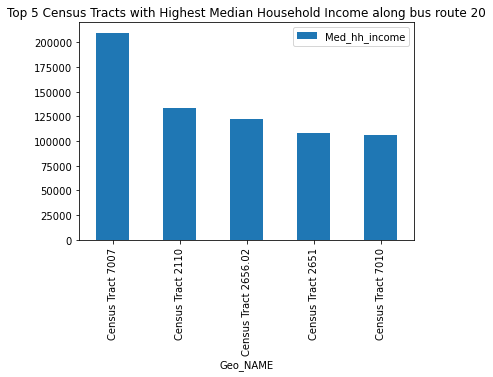

In [129]:
df_sorted.head(5).plot.bar(x='Geo_NAME',
                            y='Med_hh_income', 
                            title='Top 5 Census Tracts with Highest Median Household Income along bus route 20')

Lets now visualize census tracts that have high median rent. 

In [91]:
df_sortedB=df.sort_values(by='Median_gross_rent', ascending=False)

In [97]:
df_sortedB[['Geo_NAME','Median_gross_rent']].head(5)

,Geo_NAME,Median_gross_rent
43,Census Tract 2656.02,2733
40,Census Tract 2652.02,2656
46,Census Tract 7008.01,2488
38,Census Tract 2651,2439
3,Census Tract 2077.10,2429


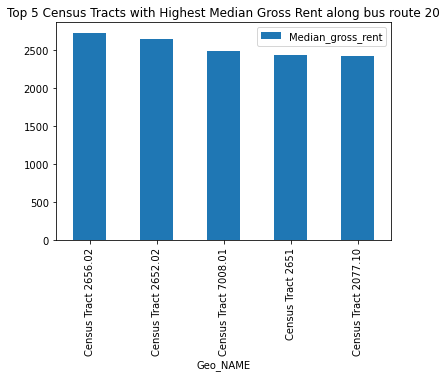

In [130]:
df_sortedB.head(5).plot.bar(x='Geo_NAME',
                            y='Median_gross_rent', 
                            title='Top 5 Census Tracts with Highest Median Gross Rent along bus route 20')

Does income and rent have any relationship with racial breakdown? Let's see

In [100]:
df.head()

,FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,Total Pop,White,Black,AmIndian_AlaskaNative,Asian,HAW_PI,Other,Two_or_more,Total Popn,Not_Hispanic_or_Latino,NHWhite,NHBlack,NHAmIndian_AlaskaNative,NHAsian,NHHaw_PI,NHOther,NHTwo_or_more,Hispanic_or_Latino,HLWhite,HLBlack,HLAmIndian_AlaskaNative,HLAsian,HLHaw_PI,HLOther,HLTwo_or_more,Totalpopulation,Less_than_high_school,High_school_graduate,Some_college,Bachelors_degree,Masters_degree,Prof_school_degree,Doctorate_degree,Med_hh_income,Med_housevalue_ooccupied,Median_gross_rent,Median_gross_rent_aspct,pctWhite,pctBlack,pctAmIndian_AlaskaNative,pctAsian,pctHAW_PI,pctOther,pctTwo_or_more
0,6037207301,Census Tract 2073.01,"Census Tract 2073.01, Los Angeles County, Cali...",6,37,207301,4806,2453,827,31,672,0.0,518,305,4806,3808,1983,827,0,672,0,50,276,998,470,0,31,0,0,468,29,4343,572,455,1092,1477,465,148,134,52581,663500.0,1578,29.900000,0.510404,0.172077,0.006450,0.139825,0.0,0.107782,0.063462
1,6037207302,Census Tract 2073.02,"Census Tract 2073.02, Los Angeles County, Cali...",6,37,207302,4556,2121,823,60,767,0.0,346,439,4556,3887,1905,823,35,767,0,39,318,669,216,0,25,0,0,307,121,4220,306,356,1071,1600,734,84,69,39809,500000.0,1748,30.100000,0.465540,0.180641,0.013169,0.168349,0.0,0.075944,0.096356
2,6037207502,Census Tract 2075.02,"Census Tract 2075.02, Los Angeles County, Cali...",6,37,207502,2851,692,298,0,1662,0.0,96,103,2851,2707,644,298,0,1662,0,0,103,144,48,0,0,0,0,96,0,2775,638,325,510,607,427,201,67,19380,NaN,471,28.000000,0.242722,0.104525,0.000000,0.582953,0.0,0.033672,0.036128
3,6037207710,Census Tract 2077.10,"Census Tract 2077.10, Los Angeles County, Cali...",6,37,207710,4350,1787,372,0,1759,0.0,330,102,4350,3693,1486,367,0,1749,0,0,91,657,301,5,0,10,0,330,11,3642,295,349,477,1432,458,335,296,90667,795500.0,2429,30.299999,0.410805,0.085517,0.000000,0.404368,0.0,0.075862,0.023448
4,6037208710,Census Tract 2087.10,"Census Tract 2087.10, Los Angeles County, Cali...",6,37,208710,4622,568,167,1,2789,0.0,1000,97,4622,3300,282,167,1,2773,0,15,62,1322,286,0,0,16,0,985,35,3601,351,757,862,1287,220,26,98,59429,373800.0,1312,30.400000,0.122891,0.036132,0.000216,0.603418,0.0,0.216357,0.020987


In [101]:
df_sortedC = df.sort_values(by='pctWhite',ascending = False)

In [102]:
df_sortedC[['Geo_NAME','pctWhite']].head(5)

,Geo_NAME,pctWhite
38,Census Tract 2651,0.892405
45,Census Tract 7007,0.873056
50,Census Tract 7010,0.854526
31,Census Tract 2147,0.824479
48,Census Tract 7009.01,0.805722


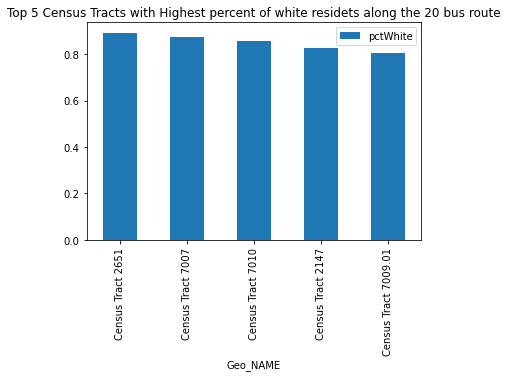

In [103]:
df_sortedC.head(5).plot.bar(x='Geo_NAME',
                            y='pctWhite', 
                            title='Top 5 Census Tracts with Highest percent of white residets along the 20 bus route')

Lets see what census tracts in the bus route have highest percent of Black and Asian residents

In [104]:
df_sortedD = df.sort_values(by='pctBlack',ascending = False)

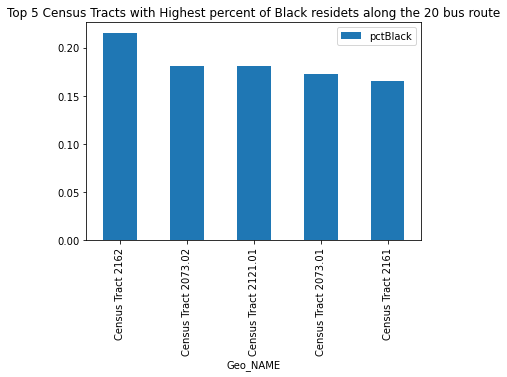

In [105]:
df_sortedD.head(5).plot.bar(x='Geo_NAME',
                            y='pctBlack', 
                            title='Top 5 Census Tracts with Highest percent of Black residents along the 20 bus route')

In [106]:
df_sortedE = df.sort_values(by='pctAsian',ascending = False)

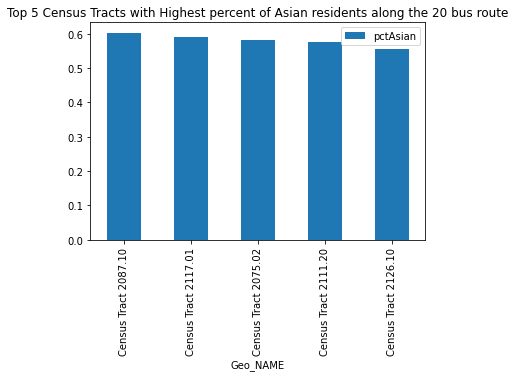

In [107]:
df_sortedE.head(5).plot.bar(x='Geo_NAME',
                            y='pctAsian', 
                            title='Top 5 Census Tracts with Highest percent of Asian residents along the 20 bus route')

Cannot tell much pattern or anything based on just this information. Also, its hard to see based on these analysis alone since we do not have our main variable, shade access, in this dataset. 

Lets try to make some maps and see if we see anything

First let's import geopandas
../gdata/se_busline.csv

In [108]:
import geopandas as gpd

In [112]:
tractlayer=gpd.read_file('../data/la_tracts.geojson')

In [113]:
tractlayer.head()

,kind,external_id,name,slug,set,metadata,resource_uri,geometry
0,Census Tract (2012),06037101110,06037101110,06037101110-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2594737', 'NAME': '1011.10',...",/1.0/boundary/06037101110-census-tract-2012/,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,Census Tract (2012),06037101122,06037101122,06037101122-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2677213', 'NAME': '1011.22',...",/1.0/boundary/06037101122-census-tract-2012/,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,Census Tract (2012),06037101210,06037101210,06037101210-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2529724', 'NAME': '1012.10',...",/1.0/boundary/06037101210-census-tract-2012/,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,Census Tract (2012),06037101220,06037101220,06037101220-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2516085', 'NAME': '1012.20',...",/1.0/boundary/06037101220-census-tract-2012/,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,Census Tract (2012),06037101300,06037101300,06037101300-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2487732', 'NAME': '1013', 'I...",/1.0/boundary/06037101300-census-tract-2012/,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


In [114]:
#For more info on this dataset
tractlayer.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   kind          2346 non-null   object  
 1   external_id   2346 non-null   object  
 2   name          2346 non-null   object  
 3   slug          2346 non-null   object  
 4   set           2346 non-null   object  
 5   metadata      2346 non-null   object  
 6   resource_uri  2346 non-null   object  
 7   geometry      2346 non-null   geometry
dtypes: geometry(1), object(7)
memory usage: 146.8+ KB


Let's subset this data

In [115]:
tractlayer = tractlayer[['name','geometry']]


In [116]:
tractlayer.head()

,name,geometry
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


Lets rename the column

In [117]:
tractlayer.columns = ['FIPS','geometry']

In [118]:
tractlayer.head()

,FIPS,geometry
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


Lets see how it plots

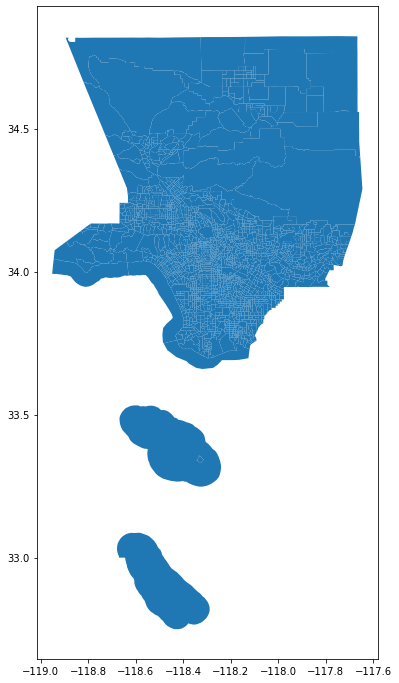

In [123]:
tractlayer.plot(figsize=(10,12))

Now, we need to join our data.Lets confirm our datatypes before that.

In [131]:
tractlayer.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   FIPS      2346 non-null   object  
 1   geometry  2346 non-null   geometry
dtypes: geometry(1), object(1)
memory usage: 36.8+ KB


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FIPS                      51 non-null     int64  
 1   Geo_NAME                  51 non-null     object 
 2   Geo_QName                 51 non-null     object 
 3   Geo_STATE                 51 non-null     int64  
 4   Geo_COUNTY                51 non-null     int64  
 5   Geo_TRACT                 51 non-null     int64  
 6   Total Pop                 51 non-null     int64  
 7   White                     51 non-null     int64  
 8   Black                     51 non-null     int64  
 9   AmIndian_AlaskaNative     51 non-null     int64  
 10  Asian                     51 non-null     int64  
 11  HAW_PI                    51 non-null     float64
 12  Other                     51 non-null     int64  
 13  Two_or_more               51 non-null     int64  
 14  Total Popn  

tracts_race=tracts.merge(df,on="FIPS")

In [133]:
tracts_new=tractlayer.merge(df,on="FIPS")

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat